# 1. Loading dependencies

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
#from imblearn.over_sampling import SMOTE
import imblearn
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer, SnowballStemmer

# 2. Loading Data

In [2]:
sms = pd.read_csv('messages.csv',encoding='latin-1')
sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
print ('Shape = >',sms.shape)

Shape = > (2893, 3)


In [4]:
smsvalue=sms.label.value_counts()
smsvalue

0    2412
1     481
Name: label, dtype: int64

In [5]:
percentage=round(smsvalue/len(sms)*100)

In [6]:
percentage

0    83.0
1    17.0
Name: label, dtype: float64

In [7]:
sms['length'] = sms.message.str.len()
sms.head(2)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800


In [8]:
sms['lengthS'] = sms.subject.str.len()
sms.head(2)

,subject,message,label,length,lengthS
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,39.0
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800,NaN


# 3.CLEANING OF THE DATA

In [9]:
sms['message'] = sms['message'].str.lower()

In [10]:
# Replace email addresses with 'email'
sms['message'] = sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
sms['message'] = sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
sms['message'] = sms['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
sms['message'] = sms['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [11]:
# Remove punctuation
sms['message'] = sms['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
sms['message'] = sms['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
sms['message'] = sms['message'].str.replace(r'^\s+|\s+?$', '')

In [12]:
from nltk.corpus import wordnet
import string
import re
from nltk import pos_tag
from nltk.corpus import stopwords

# Return the wordnet object value corresponding to the POS tag
#Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def clean_text(text):
    # lower text
    text = text.lower()
    text = re.sub("[^\w\s]", " ", text) 
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # Remove leading and trailing whitespace
    #text=re.sub("[^\s+|\s+?$]"," ",text)
    # remove stop words
    stop = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #text=stemmer.stem(text)
    # remove words with only two letter
    text = [t for t in text if len(t) > 2]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
sms["message_clean"] = sms["message"].apply(lambda x: clean_text(x))


In [14]:
# Add number of characters column
sms["clean_length"] = sms["message_clean"].apply(lambda x: len(x))

# Add number of words column
sms["clean_words"] = sms["message_clean"].apply(lambda x: len(x.split(" ")))

sms.head()

,subject,message,label,length,lengthS,message_clean,clean_length,clean_words
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856,39.0,content length numbr apple iss research center...,1954,241
1,NaN,lang classification grimes joseph e and barbar...,0,1800,NaN,lang classification grime joseph barbara grime...,1371,179
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435,50.0,post inquiry sergei atamas satamas umabnet umd...,1013,145
3,risk,a colleague and i are researching the differin...,0,324,4.0,colleague research differ degree risk perceive...,191,28
4,request book information,earlier this morning i was on the phone with a...,0,1046,24.0,earlier morning phone friend mine live south a...,579,81


In [16]:
# Total length removal
print ('Origian Length', sms.length.sum())
print ('Clean Length', sms.clean_length.sum())

Origian Length 9344743
Clean Length 6279634


# 4.Data Visualization

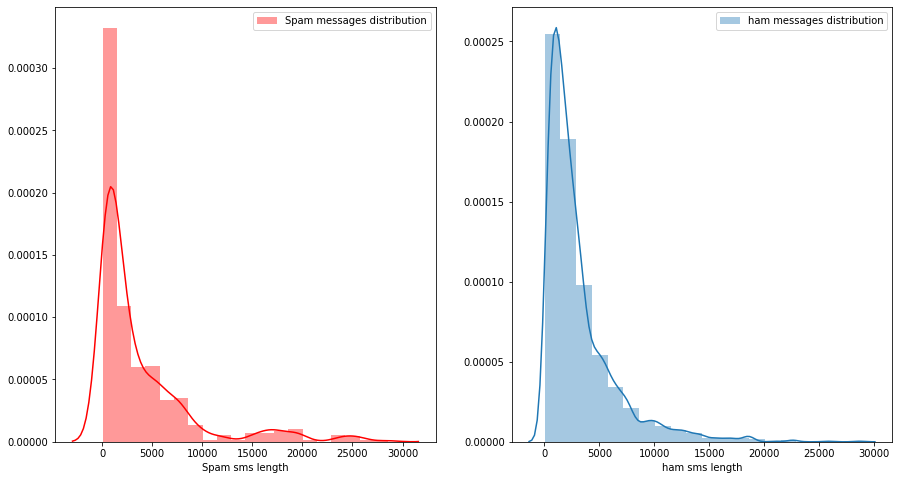

In [19]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

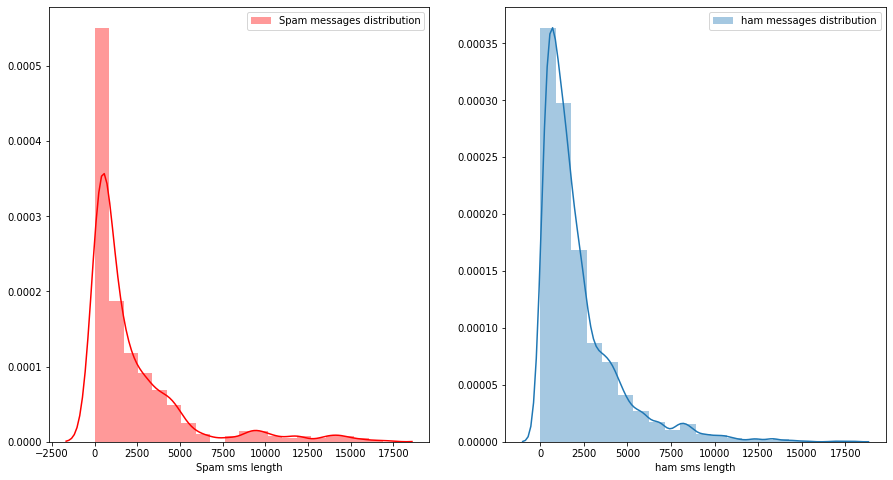

In [20]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

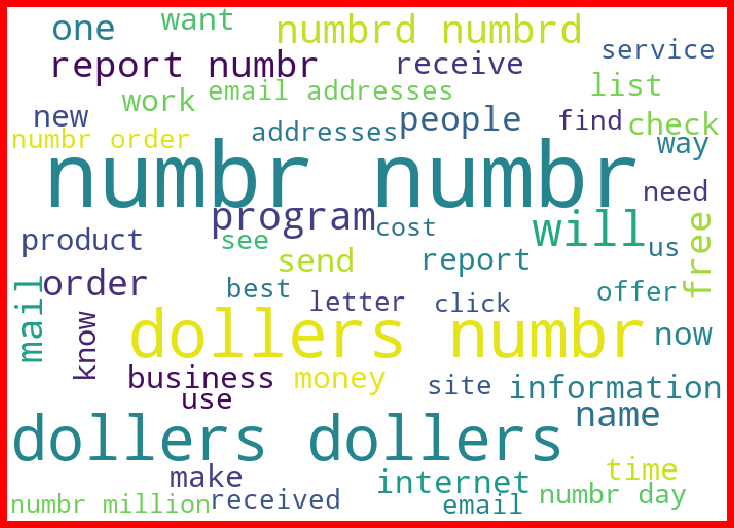

In [21]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = sms['message'][sms['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

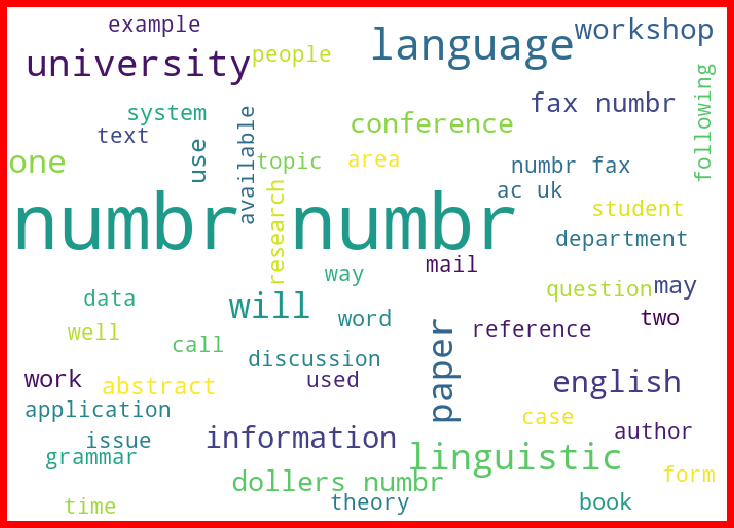

In [23]:
from wordcloud import WordCloud


spams = sms['message'][sms['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [29]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#tf_vec = TfidfVectorizer()

#naive = MultinomialNB()

#features = tf_vec.fit_transform(sms['message'])

#X = features
#y = sms['label']

# Feature Extraction

In [24]:
#Function to apply the count vectorizer(BOW)
from sklearn.feature_extraction.text import CountVectorizer 

def features_transform_cv(body):
    #get the bag of words for the mail text
    cv = CountVectorizer()
    features = cv.fit_transform(body)
    #print sparsity value
    print('sparse matrix shape:', features.shape)
    print('number of non-zeros:', features.nnz) 
    print('sparsity: %.2f%%' % (100.0 * features.nnz / (features.shape[0] * features.shape[1])))
    return features

In [25]:
x = features_transform_cv(sms['message_clean'])
y = sms['label']

sparse matrix shape: (2893, 50049)
number of non-zeros: 468535
sparsity: 0.32%


# 5. MODEL BUILDING

In [26]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** Random Forest *****************************


RandomForestClassifier()


Max Accuracy Score corresponding to Random State  82 is: 0.9896373056994818


Learning Score :  0.9997407983411094
Accuracy Score :  0.9879101899827288
Cross Val Score :  0.9340579340710139
roc auc score :  0.9760610766045549


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       483
           1       0.97      0.96      0.96        96

    accuracy                           0.99       579
   macro avg       0.98      0.98      0.98       579
weighted avg       0.99      0.99      0.99       579



Confusion Matrix:
 [[480   3]
 [  4  92]]





*************************** GradientBoostingClassifier *****************************


GradientBoostingClassifier()


Max Accuracy Score corresponding to Random State  64 is: 0.9758203799654577


Learning Score :  0.9821150855365475
Accuracy Score :  0.9671848013816926
C

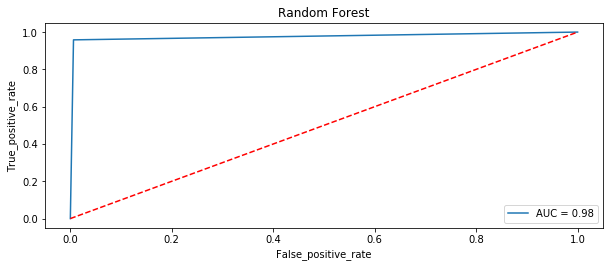

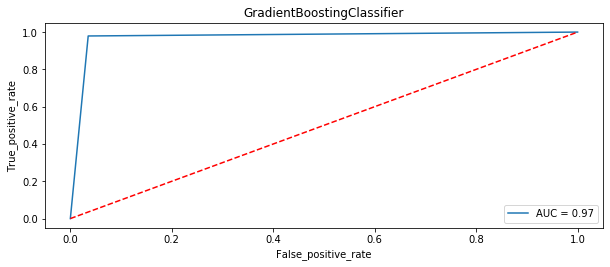

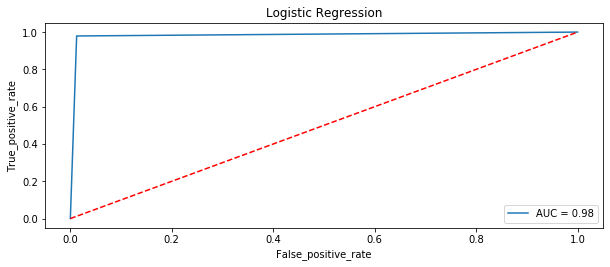

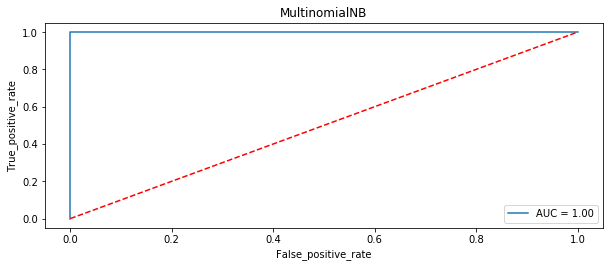

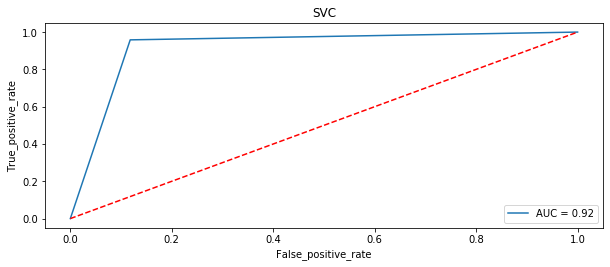

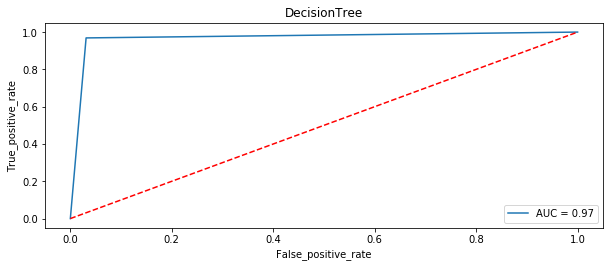

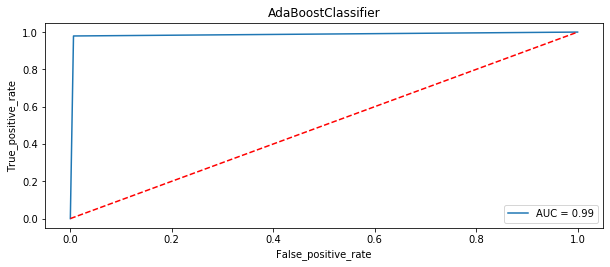

In [29]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("Random Forest",RandomForestClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("Logistic Regression",LogisticRegression()))
models.append(('MultinomialNB',MultinomialNB()))
models.append(("SVC",SVC()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))


#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    x_train, y_train = SMOTE().fit_sample(x_train, y_train)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='f1').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')


In [30]:
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,Random Forest,99.9741,98.791,93.4058,97.6061
1,GradientBoostingClassifier,98.2115,96.7185,90.6988,97.1985
2,Logistic Regression,99.9222,98.6183,96.0624,98.3372
3,MultinomialNB,98.9114,100,95.3701,100
4,SVC,92.6905,89.4646,70.2442,92.016
5,DecisionTree,99.9741,96.8912,86.5547,96.8847
6,AdaBoostClassifier,98.9891,99.1364,94.7652,98.6478


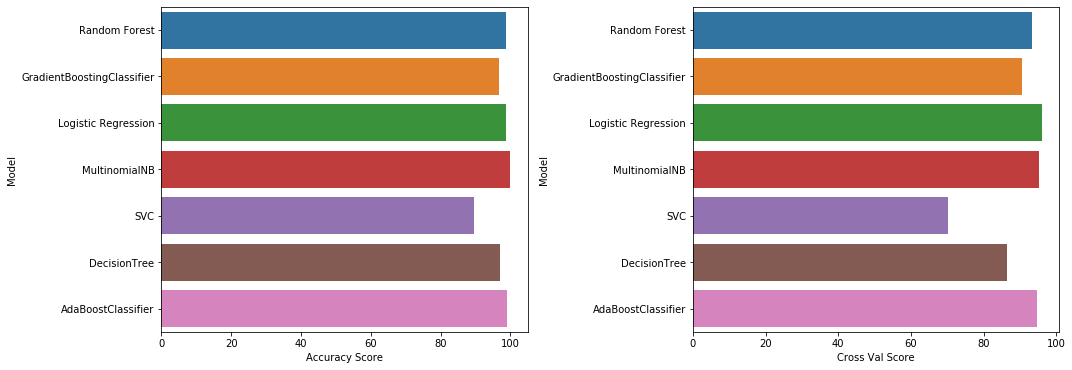

In [31]:
#Plotting bar plot of accuracy scores and crossval scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Accuracy Score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Val Score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


From above results we can conclude that MultinomialNB performing well as compared to other models.

In [32]:
#Define a function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [33]:
#lets make our MultinomialNB as final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 47,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
evaluate_preds(y_test,predmnb)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

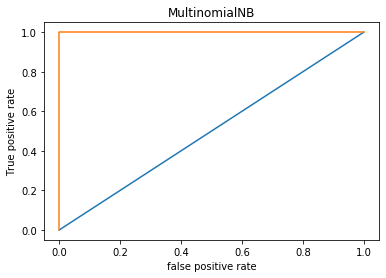

roc_auc_score =  1.0


In [34]:
y_probs = mnb.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='MultinomialNB')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('MultinomialNB')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

[[483   0]
 [  0  96]]


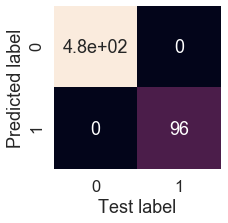

In [35]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predmnb):

    # Plots a nice looking confusion matrix using Seaborn's heatmap()
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predmnb),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predmnb)
#lets printed confusion_matrix
print(confusion_matrix(y_test, predmnb))

In [36]:
# Printing predicted values 
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predmnb
test
# On the lest side values are those fields which are taken by machine for test...

,label,Predicted values
1903,0,0
1455,0,0
1544,0,0
836,0,0
526,0,0
...,...,...
316,0,0
1344,0,0
2049,1,1
1043,0,0


In [37]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(predmnb)
df1.to_csv('Project_2_spam_mails_submission.csv')

In [41]:
#lets save the model using joblib
import joblib
joblib.dump(mnb,'Project_2_spam_mails.pkl')

['Project_2_spam_mails.pkl']

In [42]:
#read the file using joblib
mnb_from_joblib=joblib.load('Project_2_spam_mails.pkl')
joblib_y_preds = mnb_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

Conclusion
Some of the words like dollers,free,offer,business,money etc" are indication of spams
MultinomialNB performing very well as compared to other models considering below results :
Precision: 1
Recall: 1
F1 score: 1
roc_auc_score : 1
accuracy : 100%